In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [14]:
directory = '../dataset/'
ori_name = ['AMD.csv', 'FB.csv', 'FSV.csv', 'INFY.csv', 'KNX.csv', '002120.csv', '601318.csv', '601288.csv',
          'MONDY.csv', 'MTDR.csv', 'SINA.csv', 'TMUS.csv', 'TSLA.csv', 'TWTR.csv']
stocks = [directory + s for s in ori_name]
stocks

['../dataset/AMD.csv',
 '../dataset/FB.csv',
 '../dataset/FSV.csv',
 '../dataset/INFY.csv',
 '../dataset/KNX.csv',
 '../dataset/002120.csv',
 '../dataset/601318.csv',
 '../dataset/601288.csv',
 '../dataset/MONDY.csv',
 '../dataset/MTDR.csv',
 '../dataset/SINA.csv',
 '../dataset/TMUS.csv',
 '../dataset/TSLA.csv',
 '../dataset/TWTR.csv']

In [15]:
dfs = [pd.read_csv(s)[['Date', 'Close']] for s in stocks]

In [16]:
from functools import reduce
data = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs).iloc[:, 1:]
data.head()

,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y
0,18.830000,135.679993,67.230003,9.61,25.840000,17.6521,52.9935,3.1971,43.630001,16.070000,54.750000,65.260002,310.119995,28.809999
1,17.049999,131.740005,66.080002,9.47,25.209999,17.6347,53.4737,3.2152,43.130001,15.930000,53.299999,65.019997,300.359985,27.990000
2,19.000000,137.949997,69.290001,9.63,26.540001,17.4430,54.3477,3.2607,43.584702,17.030001,57.680000,67.489998,317.690002,29.950001
3,20.570000,138.050003,71.199997,9.71,27.379999,17.4663,54.0692,3.2425,45.160000,18.260000,59.639999,68.440002,334.959991,31.340000
4,20.750000,142.529999,71.870003,9.75,28.629999,17.1585,53.5890,3.2062,45.410000,18.900000,57.849998,67.769997,335.350006,31.799999


In [17]:
returns = data.pct_change()
mean_daily_returns = returns.mean()
volatilities = returns.std()

In [18]:
mean_daily_returns * 252

Close_x    2.009137
Close_y    1.031146
Close_x    1.149344
Close_y    0.645130
Close_x    1.086672
Close_y    0.992762
Close_x    1.581540
Close_y    0.296874
Close_x    0.360168
Close_y    0.985440
Close_x    0.399847
Close_y    0.504399
Close_x   -0.665798
Close_y    0.775191
dtype: float64

In [19]:
volatilities * 252

Close_x    12.814177
Close_y     5.801857
Close_x     3.474783
Close_y     3.125040
Close_x     7.471460
Close_y     6.017706
Close_x     5.071024
Close_y     3.081380
Close_x     4.775651
Close_y     9.127165
Close_x     8.182090
Close_y     2.839092
Close_x     8.180852
Close_y     6.654453
dtype: float64

In [20]:
combine = pd.DataFrame({'returns': mean_daily_returns * 252,
                       'volatility': volatilities * 252})

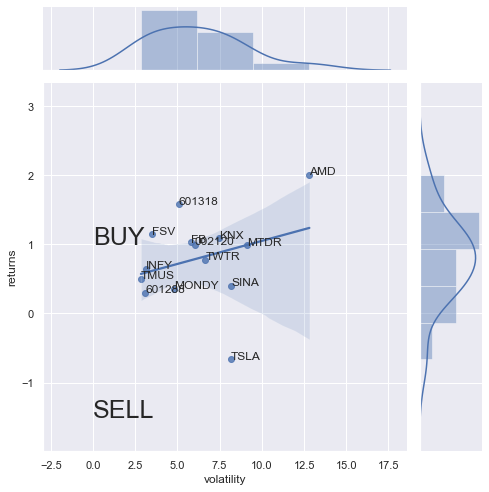

In [21]:
g = sns.jointplot("volatility", "returns", data=combine, kind="reg",height=7)

for i in range(combine.shape[0]):
    plt.annotate(ori_name[i].replace('.csv',''), (combine.iloc[i, 1], combine.iloc[i, 0]))
    
plt.text(0, -1.5, 'SELL', fontsize=25)
plt.text(0, 1.0, 'BUY', fontsize=25)
    
plt.show()